# Introduzione ai modelli matematici di diffusione epidemiologica
### Paolo Caressa, PhD
#### Ver. 1.0 marzo 2020

### 1. Premessa

Lo scopo di questi appunti è di fornire una rapida introduzione ai modelli deterministici della diffusione epidemica: si tratta delle nozioni più elementari, che presuppongono soltanto una conoscenza di base del calcolo differenziale, diciamo una analisi 1.

Spero che queste note diano una seppur fugace impressione dell'importanza dei metodi elementari dei sistemi dinamici, che veramente richiedono quattro derivate per essere espressi, e consentano di trovare un interesse scientifico nell'attuale congiuntura epidemica di cui tanto si (s)parla.

Come primo riferimento in italiano per approfondire la parte teorica di questo affascinante argomento suggerisco il manuale di Mascia-Montefusco "*Un invito alla biomatematica*", LaDotta, 2015.


### 2. Il modello più semplice: SI

Consideriamo il diffondersi di un virus in una popolazione: vogliamo studiare la diffusione dell'epidemia in una popolazione, e per farlo suddividiamo la popolazione in "compartimenti".

Nel modello più semplice abbiamo due compartimenti:

- $S$ (che sta per *Suscettibili*) cioè il gruppo di persone che non hanno la malattia ma possono contrarla.
- $I$ (che sta per *Infetti*) cioè il gruppo di persone che hanno contratto la malattia.

Quel che vogliamo capire è il passaggio $S\to I$, che comporta capire quanti suscettibili divengono infetti, e a che velocità.

Supponendo che il numero totale di persone nella popolazione sia $N$, abbiamo che $S+I=N$, quel che vogliamo determinare è l'incremento $\Delta I(t)$ di persone che contraggono l'infezione fra l'istante $t$ e l'istante $t+\Delta t$. L'ipotesi che facciamo è che questo incremento soddisfi la relazione

$$
    \Delta I(t) = I(t+\Delta t) - I(t) = \beta \frac{I(t)S(t)}{N}\,\Delta t
$$

dove $\beta$ è una costante da determinarsi. Supponendo che le nostre variabili siano continue (anche se in realtà sono discrete in quanto rappresentano la numerosità di una popolazione), siamo quindi tentati di dedurne che

$$
    \frac{\Delta I(t)}{\Delta t} = \beta \frac{I(t)S(t)}{N}
$$

e quindi, passando al limite per $\Delta t\to 0$, troviamo la relazione differenziale

$$
    \frac{dI}{dt} = \beta \frac{IS}{N}
$$

Facciamo l'ipotesi che $N$ sia costante nel tempo, da cui $S(t)=N-I(t)$, che consente di scrivere anche l'equazione per la dinamica di $S$:

$$
    \frac{dS}{dt} = - \frac{dI}{dt} = -\frac\beta N IS
$$

A ben vedere queste due equazioni sono equivalenti all'unica equazione

$$
    \frac{dI}{dt} = \beta \frac{I(N-I)}{N}
$$

(Spesso si scrive $I'(t)$ per indicare la derivata $\frac{dI}{dt}$ di una funzione $I(t)$.)


#### Integrazione esatta del modello SI

Poiché la soluzione di questa equazione differenziale si può scrivere in modo esatto, facciamolo (non capita quasi mai!): questa parte è puramente matematica ma comunque esorto tutti a provare a leggerla in quanto ci consentirà di guardare "in faccia" la soluzione del nostro modello, cioè la funzione $I(t)$ che indica l'andamento degli infettati.

L'equazione che abbiamo ricavato, $I'=\beta I(N-I)/N$, ha la caratteristica che le variabili che vi figurano sono separabili, per cui possiamo portare tutti termini che contengono la $I$ da una parte lasciando quelli che contengono la $t$ dall'altra, integrando poi ambo i membri come (scrivo $I_0=I(t_0)$ e $I_1=I(t_1)$)

$$
    \int_{I_0}^{I_1} \frac{N}{I(N-I)}dI = \beta \int_{t_0}^{t_1} dt = \beta(t_1 - t_0)
$$

L'integrazione del primo membro di questa equazione è facile (uso la sostituzione $J=N-I$ da cui $dJ=-dI$):

\begin{align*}
    \int_{I_0}^{I_1} \frac{N}{I(N-I)}dI
        &= \int_{I_0}^{I_1} \frac{dI}{I} + \int_{I_0}^{I_1} \frac{dI}{N-I}
            = \int_{I_0}^{I_1} \frac{dI}{I} - \int_{N-I_0}^{N-I_1} \frac{dJ}{J}   \\
        &= \log\frac{I_1}{I_0} - \log\frac{N-I_1}{N-I_0}
            = \log\frac{I_1(N-I_0)}{I_0(N-I_1)}
\end{align*}

Pertanto abbiamo

$$
    e^{\beta(t_1-t_0)} = \frac{I_1(N-I_0)}{I_0(N-I_1)}
$$

da cui segue $I_0(N-I_1)e^{\beta(t_1-t_0)} = I_1(N-I_0)$, quindi $I_0Ne^{\beta(t_1-t_0)}=I_1(N-I_0+I_0e^{\beta(t_1-t_0)})$, il che ci consente di scrivere esplicitamente $I_1$:

$$
    I_1 = \frac{I_0Ne^{\beta(t_1-t_0)}}{N-I_0+I_0e^{\beta(t_1-t_0)}}
        = \frac{I_0N}{S_0e^{-\beta(t_1-t_0)}+I_0}
$$

rammentando che $S=I-N$.

Abbiamo quindi trovato una espressione esplicita per l'andamento degli infetti per ogni $t$,

$$
    I(t) = \frac{I_0N}{(N-I_0)e^{-\beta(t-t_0)}+I_0}
$$

che dipende da una serie di costanti: $I_0$ è il valore iniziale di $I$ mentre $\beta$ è una costante che dipende dalla malattia.

Proviamo a graficare questa funzione per alcuni valori di $\beta$, supponendo che la condizione iniziale, su una popolazione di $N=1000$ sia di $I_0=10$ infetti. Ecco un programmino Python che svolge questo compito.

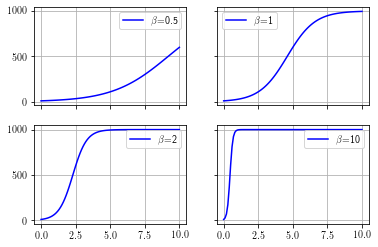

In [75]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
N = 1000
t0 = 0
t1 = 10
I0 = 10
t = np.linspace(t0, t1, 100)

def grafico(handle, beta, colore):
    y = [I0*N/((N-I0)*np.exp(-beta*(tt-t0))+I0) for tt in t]
    handle.plot(t, y, colore, label=r'$\beta$=' + str(beta))
    handle.grid()
    handle.legend(loc='best')

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')

grafico(axes[0,0], 0.5, 'b')
grafico(axes[0,1], 1, 'b')
grafico(axes[1,0], 2, 'b')
grafico(axes[1,1], 10, 'b')



Come si vede, in ogni caso il numero degli infetti tende a crescere fino a saturare tutta la popolazione: il parametro $\beta$ agisce come un tasso di crescita, nel senso che maggiore è il suo valore e più in fretta la popolazione degli infetti tende a saturare l'intera popolazione.

Potete divertirvi a variare la condizione iniziale e $\beta$, ma alla fine il risultato sarà sempre quello.

#### Integrazione numerica del modello SI

Il calcolo che abbiamo fatto nell'integrazione esatta è semplice e divertente: purtroppo so che qualcuno potrebbe opinare su questi giudizi, e anche in vista di esempi più complicati, mi sento quindi obbligato a fornire anche una integrazione dell'equazione differenziale con metodi numerici, cioè non basandoci sulle nostre magie algebriche simboliche ma lasciando fare al computer quello per cui è fatto, cioè i conti approssimati della soluzione del modello.

Si tratta di usare il solutore di equazioni differenziali ordinarie di Python e dargli in pasto direttamente la funzione che figura a secondo membro nell'equazione differenziale: ricordiamo che il modello SIS è

$$
    \frac{dI}{dt} = \beta \frac{I(N-I)}{N}
$$

Quindi è del tipo $y' = f(t,y)$ (nel nostro caso $y=I$). Ecco un programmino che usa questo metodo, il quale non ci fornisce esplicitamente la funzione $I$ che cerchiamo, ma ce la calcola nei punti desiderati, che in fondo è tutto quel che ci serve.


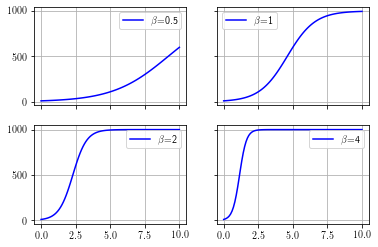

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
I0 = 10
t = np.linspace(t0, t1, 100)

def f(y,t, beta, N):
    return beta * y *(N - y)/N

def grafico(handle, beta, colore):
    y = odeint(f, I0, t, args=(beta,N))
    handle.plot(t, y[:,0], colore, label=r'$\beta$=' + str(beta))
    handle.grid()
    handle.legend(loc='best')

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')

grafico(axes[0,0], 0.5, 'b')
grafico(axes[0,1], 1, 'b')
grafico(axes[1,0], 2, 'b')
grafico(axes[1,1], 4, 'b')


Non è sorprendente che sia venuto lo stesso risultato precedente: l'integrazione numerica non è esatta ma nella pratica del calcolo scientifico fornisce gli stessi risultati di quella esatta (nella rappresentazione dei numeri all'interno dei computer non c'è nulla di realmente esatto...).

### Il modello SIS

I risultati del modello SI non sembrano molto incoraggianti... ma è intuitivo attendersi che alla fine tutti si ammaleranno prima o poi, dato che la dinamica del modello prevede solo la possibilità di passare dal compartimento $S$ al compartimento $I$.

Tuttavia potrebbe darsi che un malato guarisca (anzi lo speriamo vivamente), col che tornerebbe nel compartimento $S$: dunque un modello un pochino più sofisticato è dato dallo schema

$$
    S \to I \to S
$$

Naturalmente le equazioni si complicano per tenere conto anche della transizione inversa, da infetto a suscettibile: in particolare, se nel modello SI l'equazione che descrive il tasso con cui cresce il comparimento degli infetti è

$$
    I'(t) = \beta \frac{I(N-I)}{N}
$$

nel modello SIS questo tasso di crescita viene frenato da una certa quota di infetti che tornano suscettibili, e che supponiamo proporzionali agli infetti:

$$
    I'(t) = \beta \frac{I(N-I)}{N} - \gamma I
$$

Dal punto di vista del compartimento dei suscettibili, l'equazione precedente diviene

$$
    S'(t) = -\beta\frac{S(N-S)}{N} +\gamma(N-S)
$$

Notiamo che, sommando queste equazioni, troviamo $I'+S' = 0$, cioè che $N=I+S$ è costante, cosa che supponevamo nel modello SI.

L'equazione per la dinamica della $I$ è ancora a variabili separabili e se qualcuno vuole divertirsi a dedurla come abbiamo fatto in precedenza gli dò il suggerimento di distinguere il caso $\beta=\gamma$ dal caso $\beta\neq\gamma$ che danno luogo ad equazioni diverse.

Qui cedo alla pigrizia e faccio fare il conto al computer: nei seguenti programmini Python mostro le curve relative alla soluzione $I(t)$ del modello SIS per diversi valori e combinazioni di $\beta$ e $\gamma$, pensando sempre a una popolazione di $N=1000$ persone con un numero iniziale di infetti $I_0=100$ (naturalmente cambiando i dati del programma si possono sperimentare le curve per altri valori, il motivo principale per cui queste note sono redatte in un foglio Jupyter è proprio dare a chi le legge la possibilità di giocare con i modelli).

Nei grafici indichiamo i valori del rapporto

$$
    \sigma = \frac{\beta}{\gamma}
$$


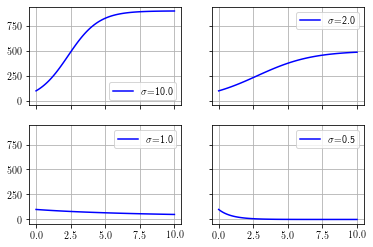

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

N = 1000
t0 = 0
t1 = 10
I0 = 100
t = np.linspace(t0, t1, 100)

def f(y,t, beta, gamma, N):
    return beta * y *(N - y)/N - gamma * y

def grafico(handle, beta, gamma, colore):
    y = odeint(f, I0, t, args=(beta,gamma,N))
    handle.plot(t, y[:,0], colore, label=r'$\sigma$=' + str(beta/gamma))
    handle.grid()
    handle.legend(loc='best')

fig, axes = plt.subplots(2, 2, sharex='all', sharey='all')

grafico(axes[0,0], 1, 0.1, 'b')
grafico(axes[0,1], 1, 0.5, 'b')
grafico(axes[1,0], 1, 1, 'b')
grafico(axes[1,1], 1, 2, 'b')


Come si vede il numero degli infetti non tende necessariamente al numero totale della popolazione: in particolare, se $\sigma\leq 1$ il numero degli infetti decresce sempre di più, e in un tempo sufficientemente lungo si azzera.

Invece, se $\sigma>1$ il numero degli infetti cresce con un andamento simile a quello del modello SIS ma con l'importante differenza di non tendere a saturare tutta la popolazione, ma di assestarsi su un numero massimo di infetti che è percentualmente dato da $I_E = (\sigma-1)/\sigma$, e che si chiama *equilibrio endemico*: una volta raggiunto l'equilibrio endemico, il compartimento degli infetti si stabilizza e l'epidemia diviene una *endemia*, durevole nel tempo.

Per esempio, se $\sigma=2$ allora l'equilibrio endemico è raggiunto per un numero di infetti pari a $N\times I_E=N/2$. E infatti si vede dal grafico corrispondente che la curva raggiunge questo punto.

Per avere una idea della *asintoticità* di questo valore limite, ripetiamo il calcolo allungando smisuratamente i tempi:

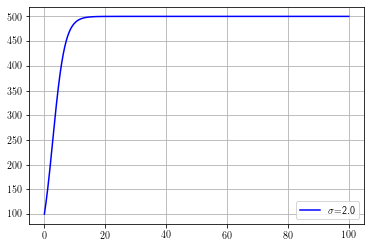

In [92]:
t0 = 0
t1 = 100
t = np.linspace(t0, t1, 1000)
grafico(plt, 1, 0.5, 'b')

Vediamo bene come l'equilibrio endemico costituisca una soglia che non è possibile superare.

### Il modello SIR

Il modello SIS ha un che di ragionevole, ma anche di rassegnatamente drammatico: l'epidemia diviene una endemia. In questo caso tuttavia, ma in generale questo accade per tutte le epidemie, il numero degli infetti diminuisce non solo perché alcuni di loro tornano nei suscettibili, ma anche per altri motivi. Gli infetti possono guarire e sviluppare una immunità, dunque non essere più suscettibili di contrarre la malattia, o morire, o essere isolati.

Viene quindi spontaneo modificare il nostro modello introducendo un nuovo compartimento, $R$ (che sta per *rimossi*) e contiene gli infetti che non sono più tali ma nemmeno più suscettibili. Lo schema del modello contempla che si possa passare nel compartimento $R$ solo se si proviene dal compartimento $I$:

$$
    S \to I \to R
$$

